## Insurance claims Fraud Detection with IN-DETAIL analysis, advanced sophisticated visualization, MULTI MODEL train and prediction collection . 

<img src="picture.jpg" width="400px">

In [1]:
# installation python libraries 

# !pip install joypy
# !pip install lightgbm
# !pip install bubbly
# !pip install plotly-express
# !pip install imblearn
# !conda install -c conda-forge shap
# !pip install eli5
# !pip install PDPbox


## Importing the Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# model and prediction details insight
import shap 
import eli5 

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

# for visualizations 
import joypy 
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb


# model, data processing and metrics 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots #for partial plots
from pdpbox import pdp, info_plots #for partial plots
from pdpbox import pdp, info_plots #for partial plots
from pdpbox import pdp, info_plots #for partial plots
from pdpbox import pdp, info_plots #for partial plots

import numpy as np 
import pandas as pd 
import sklearn
import imblearn
import os

import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [3]:
dataset_file_name = "insurance_claims.csv"

## Reading the Dataset

In [4]:
def load_dataset(dataset_file_name):
    # read and load dataset 
    data = pd.read_csv(dataset_file_name)
    return data

In [5]:
#Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
def in_detail_insight_on_the_dataset(data):
    pd.set_option('display.max_columns', None)
    print("\ndataset print 10 ros = \n", data.head(10))
    # shape of dataset
    print("\nshape of dataset = ", data.shape, "\n\n\n")
    # information about the dataset
    print("information about the dataset = \n\n\n")
    print(data.info(), "\n\n")
    # describe data with count, mean, std dev, min, max, etc values for the Numerical features
    print("data.describe() = \n\n\n", data.describe(), "\n\n")
    # dataset column correlation
    print("\ndataset column correlation = \n\n\n", data.corr())
    # dataset column covariance details 
    print("\ndataset column covariance details  = \n\n\n", data.cov())
    # check if dataset has null values or not. remove '?' by NaN Values
    data = data.replace('?',np.NaN)
    print("\n\n\nif dataset has missing values = \n\n\n")
    print(data.isnull().any())
    # Missing values details in dataset 
    missing_values = missing_values_table(data)
    print("\n\n\nmissing_values = \n\n\n", missing_values)
    print("\n\n")
    return data, missing_values 


In [7]:
def encode_object_type_column_of_dataset_and_heatmap(data):
    data1 = data.copy()
    # Label encoder for enconding of features 
    le = LabelEncoder()
    le_count = 0

    # Iterate through the columns
    for col in data1:
        if data1[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(data1[col].unique())) <= 2:
                # Train on the training data
                le.fit(data1[col])
                # Transform both training and testing data
                data1[col] = le.transform(data1[col])
            
                # Keep track of how many columns were label encoded
                le_count += 1
            
    print('\n%d columns were label encoded.' % le_count, "\n")
    sns.set(style="white")
    # matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(data1.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    return data1, le_count


In [8]:
def number_of_unique_data_in_dataset_column_and_fillna(data):
    colum_name =[]
    unique_value=[]
    # Iterate through the columns
    for col in data:
        if data[col].dtype == 'object':
            # If 2 or fewer unique categories
            colum_name.append(str(col)) 
            unique_value.append(data[col].nunique())
    table= pd.DataFrame()
    table['Col_name'] = colum_name
    table['Value']= unique_value
            
    table=table.sort_values('Value',ascending=False)
    print("\n\nnumber of unique data in dataset column\n")
    print(table)
    print("\n\n")
    
    # missing value fill using fillna
    # replace the '?' by the most common collision type. 
    print("missing value fill using fillna . \n\n")
    print("replace the '?' by the most common collision_type column . \n")
    data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)
    print(data[['collision_type']])
    # as there are no responses for property damage, it is taken as No property damage.
    print("as there are no responses for property_damage column, it is taken as No property_damage . \n")
    data['property_damage'].fillna('NO', inplace = True)
    print(data[['property_damage']])
    # if no responses fpr police report, take it as No report available
    print("since thee are no responses fpr police report in police_report_available column, it is taken as No report available . \n")
    data['police_report_available'].fillna('NO', inplace = True)
    print(data[['police_report_available']])
    print("\nis null in data = ", data.isnull().any().any())
    return table, data

# Start Data Visualizations  

In [9]:
def start_data_visualizations(data):
    # **Scatter Plot between Policy annual premium vs total claim amount** 
    # plotting a scatter plot

    fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'rug', marginal_y = 'histogram')
    fig.show()
    
    fig = px.scatter_matrix(data, dimensions=["injury_claim", "property_claim", "vehicle_claim"],
                        color = "insured_sex")
    fig.show()
    
    fig = px.parallel_categories(data, color="total_claim_amount", color_continuous_scale=px.colors.sequential.Inferno)
    fig.show()
    
    fraud = data['fraud_reported'].value_counts()

    label_fraud = fraud.index
    size_fraud = fraud.values

    colors = ['silver', 'gold']
    trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)

    df = [trace]

    layout = go.Layout(
           title = 'Distribution of Frauds')

    fig = go.Figure(data = df, layout = layout)

    py.iplot(fig)
    
    fig, axes = joypy.joyplot(data,
                         column = ['incident_hour_of_the_day','number_of_vehicles_involved', 'witnesses'],
                         by = 'incident_city',
                         ylim = 'own',
                         figsize = (20, 10),
                         alpha = 0.5, 
                         legend = True)

    plt.title('Incident hour, No. of vehicles, witnesses vs Incident City', fontsize = 20)
    plt.show()
    
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.stripplot(data['property_damage'], data['property_claim'], palette = 'bone')
    plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
    plt.show()
    
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.boxenplot(data['incident_type'], data['vehicle_claim'], palette = 'pink')
    plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
    plt.show()
    
    incident = pd.crosstab(data['incident_city'], data['incident_type'])
    colors = plt.cm.Blues(np.linspace(0, 1, 5))
    incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)
    plt.title('Incident Type vs Collision Type', fontsize = 20)
    plt.legend()
    plt.show()
    
    
    incident = pd.crosstab(data['incident_type'], data['incident_severity'])
    colors = plt.cm.summer(np.linspace(0, 1, 5))
    incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)
    plt.title('Incident Type vs Collision Type', fontsize = 20)
    plt.legend()
    plt.show()
    
    # let's check the insured hobbies

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.countplot(data['insured_occupation'], palette = 'PuRd')
    plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
    plt.xticks(rotation = 90)
    plt.show()    
    
    # let's check the insured hobbies

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.countplot(data['insured_hobbies'], palette = 'cool')
    plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
    plt.xticks(rotation = 90)
    plt.show() 
    
    # let's check the incident types

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.countplot(data['incident_type'], palette = 'spring')
    plt.title('Different Types of Incidents', fontsize = 20)
    plt.show()
    
    # swarm plot

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (15, 8)

    sns.swarmplot(data['policy_state'], data['total_claim_amount'], palette = 'copper')
    plt.title('Policy State vs Total Claim Amount', fontsize = 20)
    plt.show()
    
    # Plot
    plt.figure(figsize=(20, 10), dpi= 80)

    parallel_coordinates(data[['total_claim_amount','injury_claim', 'property_claim','vehicle_claim','fraud_reported']],
                     'fraud_reported',  colormap = 'copper')

    # Lighten borders
    plt.gca().spines["top"].set_alpha(0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(0)
    plt.gca().spines["left"].set_alpha(.3)

    plt.title('DC', fontsize = 20)
    plt.grid(alpha=0.3)

    plt.suptitle('total claim, Injury claim, Property claim, vehicle claim vs Fraud Reported', fontsize = 20)
    plt.show()
    
    figure = bubbleplot(dataset = data, x_column = 'policy_annual_premium', y_column = 'total_claim_amount', 
        bubble_column = 'insured_sex', time_column = 'auto_year', size_column = 'months_as_customer', color_column = 'insured_sex', 
        x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
        x_logscale = False, scale_bubble = 3, height = 650)

    py.iplot(figure, config={'scrollzoom': True})
    
    
    trace = go.Histogram(
              x = data['insured_education_level'],
              name = 'Marvel',
              opacity = 0.75,
              marker = dict(
                     color = 'rgb(195, 195, 145, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Education Level of the Customers')

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)
    
    
    trace = go.Histogram(
              x = data['insured_occupation'],
              name = 'Marvel',
              opacity = 0.75,
              marker = dict(
                     color = 'rgb(15, 255, 185, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Occupation of the Customers')

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)
        
    sex = data['insured_sex'].value_counts()
    rel = data['insured_relationship'].value_counts()

    label_sex = sex.index
    size_sex = sex.values

    label_rel = rel.index
    size_rel = rel.values

    colors = ['aqua', 'gold']
    trace = go.Pie(
             labels = label_sex, values = size_sex, marker = dict(colors = colors), name = 'Gender', hole = 0.3)

    colors2 = ['pink', 'lightblue','lightgreen','grey','red']
    trace2 = go.Pie(labels = label_rel, values = size_rel, marker = dict(colors = colors2), name = 'Relationship',
                    hole = 0.3)

    df = [trace]
    df2 = [trace2]

    layout1 = go.Layout(
               title = 'Gender of the Customers')
    layout2 = go.Layout(
               title = 'Relationship')

    fig = go.Figure(data = df, layout = layout1)
    fig2 = go.Figure(data = df2, layout = layout2)
    py.iplot(fig)
    py.iplot(fig2)
    
    trace = go.Violin(
              x = data['insured_sex'],
              y = data['insured_zip'],
              name = 'Gender vs Insured Zip',
              opacity = 0.75,
              marker = dict(
                      color = 'rgb(215, 5, 185, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Gender vs Insured Zip')

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)
    
    trace = go.Box(
              x = data['auto_make'],
              y = data['vehicle_claim'],
              opacity = 0.7,
              marker = dict(
                     color = 'rgb(215, 195, 5, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Automobile Company vs Vehicle Claim')

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)    
    
    trace = go.Histogram(
              x = data['policy_annual_premium'],
          
              #fill = 'tozeroy',
              marker = dict(
                     color = 'rgb(100, 75, 25, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Distribution of Annual Policy among the Customers',
        scene = dict(
                xaxis = dict(title  = 'Age'),
                yaxis = dict(title  = 'Count')
            ))

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)
    
    trace = go.Histogram(
              x = data['age'],
          
              #fill = 'tozeroy',
              marker = dict(
                     color = 'rgb(215, 245, 5, 0.5)'
              )
    )
    df = [trace]

    layout = go.Layout(
        title = 'Distribution of Age among the Customers',
        scene = dict(
                xaxis = dict(title  = 'Age'),
                yaxis = dict(title  = 'Count')
            ))

    fig = go.Figure(data = df, layout = layout)
    py.iplot(fig)
    
    trace = go.Scatter3d(
        x = data['age'],
        y = data['property_claim'],
        z = data['vehicle_claim'],
        mode = 'markers',
        marker = dict(
             size = 10,
             color = data['age']
        )
    )

    df = [trace]

    layout = go.Layout(
        title = 'Cholestrol vs Heart Rate vs Age',
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0  
        ),
        scene = dict(
                xaxis = dict(title  = 'Age'),
                yaxis = dict(title  = 'Property_claim'),
                zaxis = dict(title  = 'Vehicle_claim')
            )
    
    )
    fig = go.Figure(data = df, layout=layout)
    py.iplot(fig)
    
    


## Data Processing

In [10]:
def in_DETAIL_data_processing_and_Exploring(data):
    # let's extrat days, month and year from policy bind date
    data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')
    # let's encode the fraud report to numerical values

    data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

    # checking the values of fraud reported
    # data['fraud_reported'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    # let's check the correlation of authorities_contacted with the target

    # let's perform target encoding for auto make

    data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

    # let's check the values
    # data['auto_make'].value_counts()
    
    # let's check the correlation auto make with the target

    data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for auto make

    data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

    # let's check the values
    # data['auto_make'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for property damage

    data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

    # let's check the values
    # data['police_report_available'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for property damage

    data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))

    # let's check the values
    # data['property_damage'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's do target encoding for incident city

    data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

    # let's check the values
    # data['incident_city'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for incident state

    data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

    # checking the values
    # data['incident_state'].value_counts()
    
    # let's check the correlation of authorities_contacted with the target

    data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for authorities contacted

    data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

    # let's check the values
    #data['authorities'].value_counts()
    
    # let's check the correlation of incident_severity with the target

    data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for incident severity

    data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

    # let's check the values
    # data['incident_severity'].value_counts()
    
    # let's check the correlation of collision_type with the target

    data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for collision type

    data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

    # let's check the values of collision type
    # data['collision_type'].value_counts()
    
    # let's perform target encoding for collision type

    # let's check the correlation of incident_type with the target

    data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoing for incident type

    data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

    # let's check the values
    #data['incident_type'].value_counts()
    
    data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

    # extracting days and month from date
    data['incident_month'] = data['incident_date'].dt.month
    data['incident_day'] = data['incident_date'].dt.day
    
    # let's know the relation between insured_relationship and fraud reported

    data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's do target encoding for insured relationship

    data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

    #data['insured-relationship'].value_counts()
    
    # let's know the relation between insured_hobbies and fraud reported

    data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for insured_hobbies

    data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

    #data['insured_hobbies'].value_counts()
    
    # let's know the relation between insured_occupation and fraud reported

    data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding for insured_occupation

    data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))
    # data['insured_occupation'].value_counts()
    
    # let's know the relation of insured_education_level with faud_reported

    data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
    
    # let's perform target encoding

    data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
    #data['insured_education_level'].value_counts()
    
    # lets know the relation of insured sex and fraud reported

    data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
    
    # target encoding for sex

    data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
    #data['insured_sex'].value_counts()
    
    # csl - combined single limit

    '''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
    Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

    # lets know the relation of policy state and fraud reported

    data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)
    
    # target encoding for policy_csl

    data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

    # check the values
    # data['policy_csl'].value_counts()
    
    
    # lets know the relation of policy state and fraud reported

    data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

    # target encoding for policy_csl

    data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

    # check the values
    # data['policy_state'].value_counts()
    
    # let's delete unnecassary columns

    data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

    # let's check the columns after deleting the columns
    print(data.columns)

    data.isna().sum()
    
    return data
    

In [11]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":1000,
       "reg_alpha" : 0.5,
       "reg_lambda":0.5,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":30,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 10,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 60,
       "max_bin":60,
       'max_depth':3,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':1.4,
        'bagging_fraction':0.8
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [12]:
def analyzed_data_visualization(data):
    f, ax = plt.subplots(figsize=(20, 20))
    sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)
    plt.show()
    data['insured_hobbies']=data['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)
    f, ax = plt.subplots(figsize=(20, 20))
    sns.countplot(x='auto_make',hue='fraud_reported',data=data)
    plt.show()
    data['insured_hobbies'].unique()
    data = pd.get_dummies(data)
    print('Training Features shape: ', data.shape)
    # Lets check if Data is balanced data or not?
    # * Looking at graph , the data looks imbalance.
    f, ax = plt.subplots(figsize=(10, 10))
    sns.countplot(x='fraud_reported',data=data)
    plt.show()
    #f, ax = plt.subplots(figsize=(20, 20))
    corr= data.corr()
    y=data['fraud_reported']
    X= data.drop('fraud_reported',axis=1)
    data = data.dropna(axis=1)
    print(data.isna().sum())
    # let's split the data into dependent and independent sets
    x = data.drop(['fraud_reported'], axis = 1)
    y = data['fraud_reported']
    print("Shape of x :", x.shape)
    print("Shape of y :", y.shape)
    # let's split the dataset into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    X_train, X_test, y_train, y_test = x_train, x_test, y_train, y_test
    predictors_train, predictors_test, response_train, response_test = x_train, x_test, y_train, y_test
    print("Shape of x_train :", x_train.shape)
    print("Shape of x_test :", x_test.shape)
    print("Shape of y_train :", y_train.shape)
    print("Shape of y_test :", y_test.shape)
    print(46*"-")
    print(x_train.isna().sum())
    print(46*"-")
    print(x_test.isna().sum())
    print(46*"-")
    print(y_train.isna().sum())
    print(46*"-")
    print(y_test.isna().sum())
    print(46*"-")
    plt.rcParams['figure.figsize'] = (15, 10)
    sns.heatmap(x_train.corr(), cmap = 'copper')
    plt.title('Heat Map for Correlations', fontsize = 20)
    plt.show()
    pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, X_test)
    print("LightGBM Training Completed...")
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_test)
    roc_auc = metrics.auc(fpr, tpr)
    f, ax = plt.subplots(figsize=(10, 10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('Plot feature importances...')
    ax = lgb.plot_importance(model, max_num_features=10)
    plt.show()
    
    return data, x, y, X_train, X_test, y_train, y_test, x_train, x_test, predictors_train, predictors_test, response_train, response_test   
    
    

## Modelling with Ensemble of Samplers

In [13]:
def model_check(data, x, y, X_train, X_test, y_train, y_test, x_train, x_test, predictors_train, predictors_test, response_train, response_test):
    # Random Forest Classifier
    model_brfc = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
    model_brfc.fit(x_train, y_train)
    y_pred_rf = model_brfc.predict(x_test)
    print("Training Accuracy: ", model_brfc.score(x_train, y_train))
    print('Testing Accuarcy: ', model_brfc.score(x_test, y_test))
    # making a classification report
    cr = classification_report(y_test,  y_pred_rf)
    print(cr)
    # making a confusion matrix
    plt.rcParams['figure.figsize'] = (5, 5)
    cm = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm, annot = True, cmap = 'spring')
    plt.show()
    # Easy Ensemble Classifier
    model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)
    model1.fit(x_train, y_train)
    y_pred_ef = model1.predict(x_test)
    print("Training Accuracy: ", model1.score(x_train, y_train))
    print('Testing Accuarcy: ', model1.score(x_test, y_test))
    # making a classification report
    cr = classification_report(y_test,  y_pred_ef)
    print(cr)
    # making a confusion matrix
    cm = confusion_matrix(y_test, y_pred_ef)
    sns.heatmap(cm, annot = True, cmap = 'copper')
    plt.show()
    # Random Forest with Bagging Classifier
    model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)
    model2.fit(x_train, y_train)
    y_pred_bc = model2.predict(x_test)
    print("Training Accuracy: ", model2.score(x_train, y_train))
    print('Testing Accuarcy: ', model2.score(x_test, y_test))
    # making a classification report
    cr = classification_report(y_test,  y_pred_bc)
    print(cr)
    # making a confusion matrix
    cm = confusion_matrix(y_test, y_pred_bc)
    sns.heatmap(cm, annot = True, cmap = 'Purples')
    plt.show()
    # **Boosting the Predictions of above Models**
    # boosting
    y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = 0
    # making a classification report
    cr = classification_report(y_test,  y_pred)
    print(cr)
    # making a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'Reds')
    plt.show()
    # **Voting Classifier**
    
    vote_est = [ 
        ('brf', BalancedRandomForestClassifier()),
        ('bc', BalancedBaggingClassifier()),
        ('eec',EasyEnsembleClassifier())]
    voting = VotingClassifier(estimators = vote_est , voting = 'soft')
    voting.fit(x_train, y_train)
    y_pred = voting.predict(x_test).astype(int)
    # making a classification report
    cr = classification_report(y_test,  y_pred)
    print(cr)
    # making a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, cmap = 'magma')
    plt.show()
    # Applying Sampling Techniques
    # **Under Sampling**
    print(y.value_counts())
    frauds = np.array(data[data['fraud_reported'] == 0].index)
    no_frauds = len(frauds)
    print(no_frauds)
    normal_indices = data[data['fraud_reported'] == 1]
    no_normal_indices = len(normal_indices)
    print(no_normal_indices)
    random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
    random_normal_indices = np.array(random_normal_indices)
    print(len(random_normal_indices))
    under_sample = np.concatenate([frauds, random_normal_indices])
    print(len(under_sample))
    # creating the undersample data
    undersample_data = data.iloc[under_sample, :]
    # splitting the undersample dataset into x and y sets
    x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
    y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']
    print(x_u.shape)
    print(y_u.shape)
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)
    print(x_train1.shape)
    print(y_train1.shape)
    print(x_test1.shape)
    # standardization
    sc = StandardScaler()
    x_train1 = sc.fit_transform(x_train1)
    x_test1 = sc.transform(x_test1)
    model_u = RandomForestClassifier()
    model_u.fit(x_train1, y_train1)
    y_pred = model_u.predict(x_test1)
    print("Training Accuracy: ", model_u.score(x_train1, y_train1))
    print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))
    # confusion matrix
    cm = confusion_matrix(y_test1, y_pred)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm, annot = True, cmap = 'winter')
    plt.show()
    # classification report
    cr = classification_report(y_test1, y_pred)
    print(cr)
    # **Over Sampling with SMOTE** 
    x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())
    print(x_resample.shape)
    print(y_resample.shape)
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
    print(x_train2.shape)
    print(y_train2.shape)
    print(x_test2.shape)
    print(y_test2.shape)
    # standardization
    sc = StandardScaler()
    x_train2 = sc.fit_transform(x_train2)
    x_test2 = sc.transform(x_test2)
    # Random Forest Classifier
    model_o = RandomForestClassifier()
    model_o.fit(x_train2, y_train2)
    y_pred = model_o.predict(x_test2)
    print("Training Accuracy: ", model_o.score(x_train2, y_train2))
    print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))
    # confusion matrix
    cm = confusion_matrix(y_test2, y_pred)
    plt.rcParams['figure.figsize'] = (5, 5)
    sns.heatmap(cm, annot = True, cmap = 'winter')
    plt.show()
    # classification report
    cr = classification_report(y_test2, y_pred)
    print(cr)
    sm = SMOTE(random_state=24)
    model_preds = {}
    # Logistic Regression
    model = LogisticRegression()
    model.fit(predictors_train, response_train)
    predictions_test = model.predict(predictors_test)
    predictions_train = model.predict(predictors_train)
    conf_matrix = confusion_matrix(predictions_test, response_test)
    plot_confusion_matrix(conf_matrix)
    precision = precision_score(predictions_test, response_test)
    recall = recall_score(predictions_test, response_test)
    print("*****************************************")
    print("Results on testing data:")
    print("*****************************************")
    print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
    print("Precision = "+str(precision))
    print("Recall = "+str(recall))
    tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
    model_preds["Logistic Regression"] = [tpr, fpr]
    print()
    print("AUC value = "+str(auc(tpr, fpr)))
    # K Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(predictors_train, response_train)
    predictions_train = knn.predict(predictors_train)
    predictions_test = knn.predict(predictors_test)
    conf_matrix = confusion_matrix(predictions_test, response_test)
    plot_confusion_matrix(conf_matrix)
    precision = precision_score(predictions_test, response_test)
    recall = recall_score(predictions_test, response_test)
    print("*****************************************")
    print("Results on testing data:")
    print("*****************************************")
    print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
    print("Precision = "+str(precision))
    print("Recall = "+str(recall))
    tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
    model_preds["K Nearest Neighbor"] = [tpr, fpr]
    print()
    print("AUC value = "+str(auc(tpr, fpr)))
    # Decision Trees
    ## Since it has a lot of categorical variables and the dataset is also not huge we 
    ## will use decision trees to get more accuracy.
    tree = DecisionTreeClassifier()
    tree.fit(predictors_train, response_train)
    predictions_test = tree.predict(predictors_test)
    predictions_train = tree.predict(predictors_train)
    conf_matrix = confusion_matrix(predictions_test, response_test)
    plot_confusion_matrix(conf_matrix)
    precision = precision_score(predictions_test, response_test)
    recall = recall_score(predictions_test, response_test)
    print("*****************************************")
    print("Results on testing data:")
    print("*****************************************")
    print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
    print("Precision = "+str(precision))
    print("Recall = "+str(recall))
    tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
    model_preds["Decision Tree"] = [tpr, fpr]
    print()
    print("AUC value = "+str(auc(tpr, fpr)))
    # Random Forest Classifier
    random_forest = RandomForestClassifier()
    random_forest.fit(predictors_train, response_train)
    predictions_test = random_forest.predict(predictors_test)
    predictions_train = random_forest.predict(predictors_train)

    conf_matrix = confusion_matrix(predictions_test, response_test)
    plot_confusion_matrix(conf_matrix)

    precision = precision_score(predictions_test, response_test)
    recall = recall_score(predictions_test, response_test)

    print("*****************************************")
    print("Results on testing data:")
    print("*****************************************")
    print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
    print("Precision = "+str(precision))
    print("Recall = "+str(recall))

    tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
    model_preds["Random Forest"] = [tpr, fpr]
    print()
    print("AUC value = "+str(auc(tpr, fpr)))
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(predictors_train, response_train)
    predictions_test = lda.predict(predictors_test)
    predictions_train = lda.predict(predictors_train)

    conf_matrix = confusion_matrix(predictions_test, response_test)
    plot_confusion_matrix(conf_matrix)

    precision = precision_score(predictions_test, response_test)
    recall = recall_score(predictions_test, response_test)

    print("*****************************************")
    print("Results on testing data:")
    print("*****************************************")
    print("Accuracy = "+str(accuracy_score(predictions_test, response_test)))
    print("Precision = "+str(precision_score(predictions_test, response_test)))
    print("Recall = "+str(recall_score(predictions_test, response_test)))

    tpr, fpr, threshold = roc_curve(predictions_test, response_test, pos_label=1)
    model_preds["Linear Discriminant Analysis"] = [tpr, fpr]
    print()
    print("AUC value = "+str(auc(tpr, fpr)))
    # Receiving Operator Charecteristic
    # Decision Trees
    plt.title("ROC curve for various classifiers:")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    for key, value in model_preds.items():
        model_list = model_preds[key]
        plt.plot(model_list[0], model_list[1], label=key)
        plt.legend()
    plt.show()
    # - As we can see from the above ROC curves and results LDA is performing well 
    # when compared to all the classifiers.
    # - KNN is performing the worst out of all the classifiers.
    
    return data, model_brfc


## Model Explanation, analysis and prediction architecture visualization 

In [14]:
def model_explanation_analysis_and_prediction_architecture_visualization(x_train, x_test, y_test, model_brfc):
    # let's check the importance of each attributes
    perm = PermutationImportance(model_brfc, random_state = 0).fit(x_test, y_test)
    eli5.show_weights(perm, feature_names = x_test.columns.tolist())
    
    base_features = x_train.columns.values.tolist()

    feat_name = 'incident_severity'
    pdp_dist = pdp.pdp_isolate(model=model_brfc, dataset=x_test, model_features = base_features, feature = feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()
    
    base_features = x_train.columns.values.tolist()

    feat_name = 'collision_type'
    pdp_dist = pdp.pdp_isolate(model=model_brfc, dataset=x_test, model_features = base_features, feature = feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()
    
    base_features = x_train.columns.values.tolist()

    feat_name = 'incident_severity'
    pdp_dist = pdp.pdp_isolate(model=model_brfc, dataset=x_test, model_features = base_features, feature = feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()
    
    
    base_features = x_train.columns.values.tolist()

    feat_name = 'insured_zip'
    pdp_dist = pdp.pdp_isolate(model=model_brfc, dataset=x_test, model_features = base_features, feature = feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()
    
    base_features = x_train.columns.values.tolist()

    feat_name = 'age'
    pdp_dist = pdp.pdp_isolate(model=model_brfc, dataset=x_test, model_features = base_features, feature = feat_name)

    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()
    
    # let's see the shap values

    explainer = shap.TreeExplainer(model_brfc)
    shap_values = explainer.shap_values(x_test)

    shap.summary_plot(shap_values[1], x_test, plot_type="bar")
    
    shap.summary_plot(shap_values[1], x_test)
    
    # let's create a function to check the patient's conditions

    def fraud_analysis(model, fraud):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(fraud)
        # shap.initjs()
        return display(shap.force_plot(explainer.expected_value[1], shap_values[1], fraud))
    
    # let's do some real time prediction for patients

    fraud = x_test.iloc[1,:].astype(float)
    fraud_analysis(model_brfc, fraud)
    
    fraud = x_test.iloc[2,:].astype(float)
    fraud_analysis(model_brfc, fraud)
    
    fraud = x_test.iloc[3,:].astype(float)
    fraud_analysis(model_brfc, fraud)
    
    fraud = x_test.iloc[4,:].astype(float)
    fraud_analysis(model_brfc, fraud)
    
    fraud = x_test.iloc[5,:].astype(float)
    fraud_analysis(model_brfc, fraud)
    
    shap_values = explainer.shap_values(x_train.iloc[:50])
    #shap.initjs()
    display(shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50]))
    
    


dataset print 10 ros = 
    months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   
5                 256   39         104594       2006-10-12           OH   
6                 137   34         413978       2000-06-04           IN   
7                 165   37         429027       1990-02-03           IL   
8                  27   33         485665       1997-02-05           IL   
9                 212   42         636550       2011-07-25           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   


2 columns were label encoded. 



number of unique data in dataset column

                   Col_name  Value
15        incident_location   1000
0          policy_bind_date    951
8             incident_date     60
19               auto_model     39
6           insured_hobbies     20
18                auto_make     14
5        insured_occupation     14
14            incident_city      7
4   insured_education_level      7
13           incident_state      7
7      insured_relationship      6
12    authorities_contacted      5
9             incident_type      4
11        incident_severity      4
10           collision_type      3
1              policy_state      3
2                policy_csl      3
16          property_damage      2
17  police_report_available      2
3               insured_sex      2
20           fraud_reported      2



missing value fill using fillna . 


replace the '?' by the most common collision_type column . 

      collision_type
0     Side Collision
1     Rear C

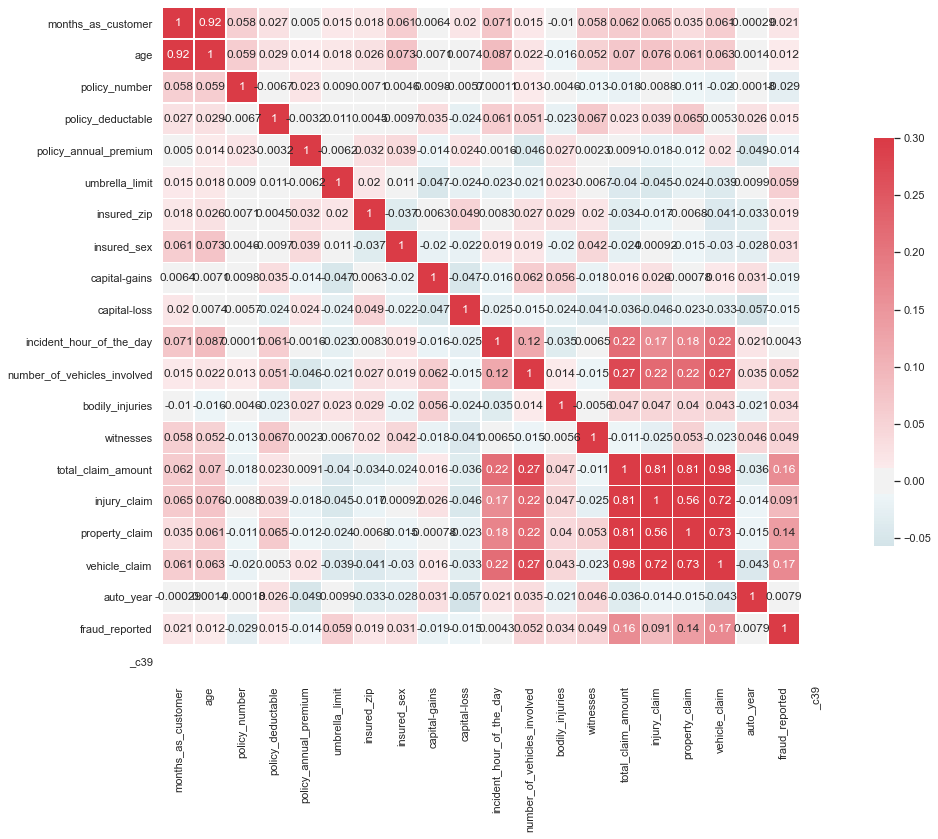

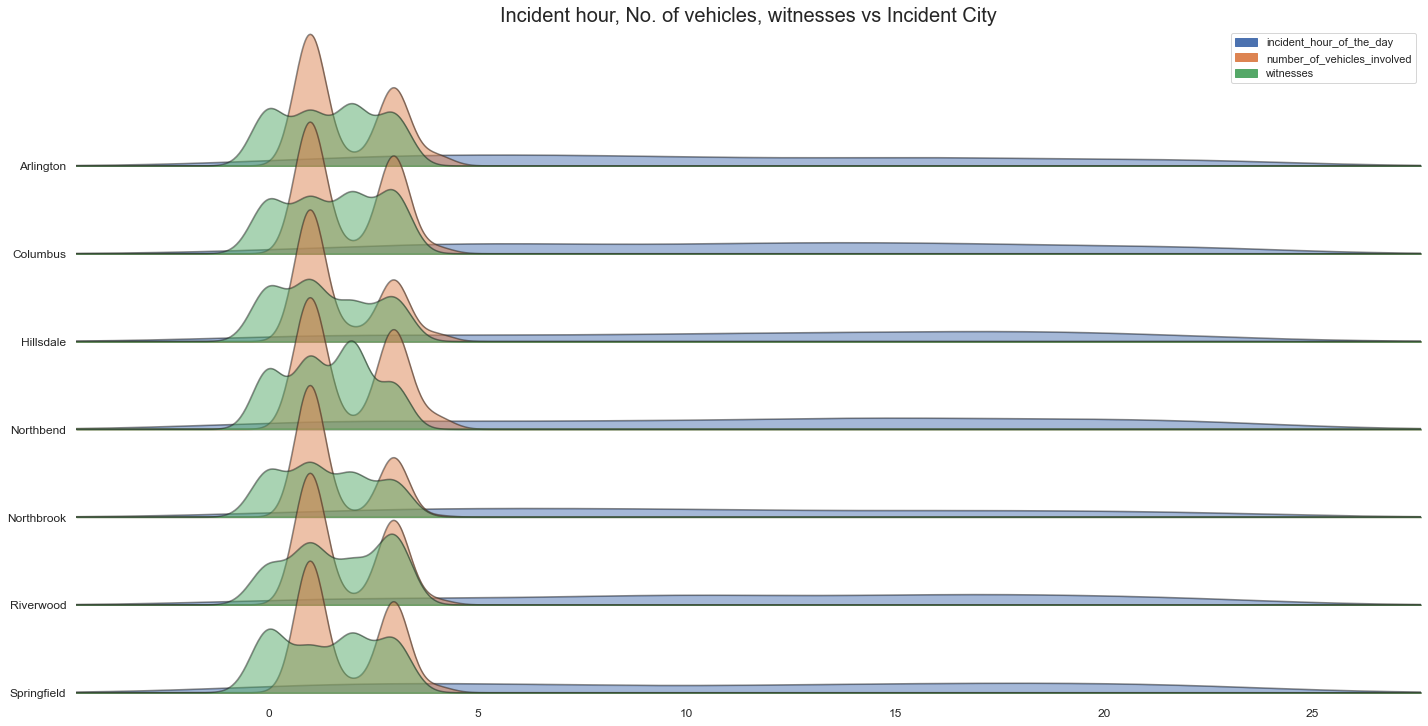

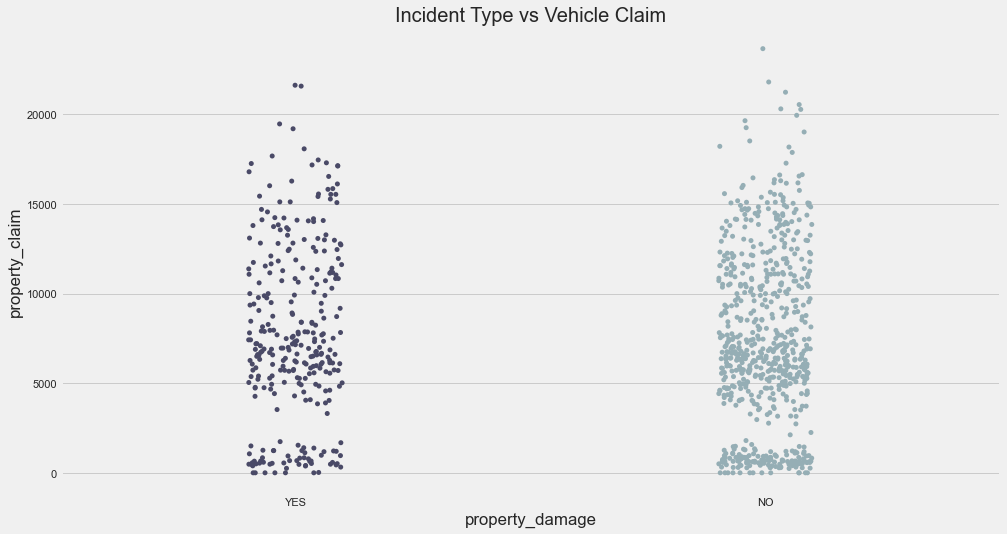

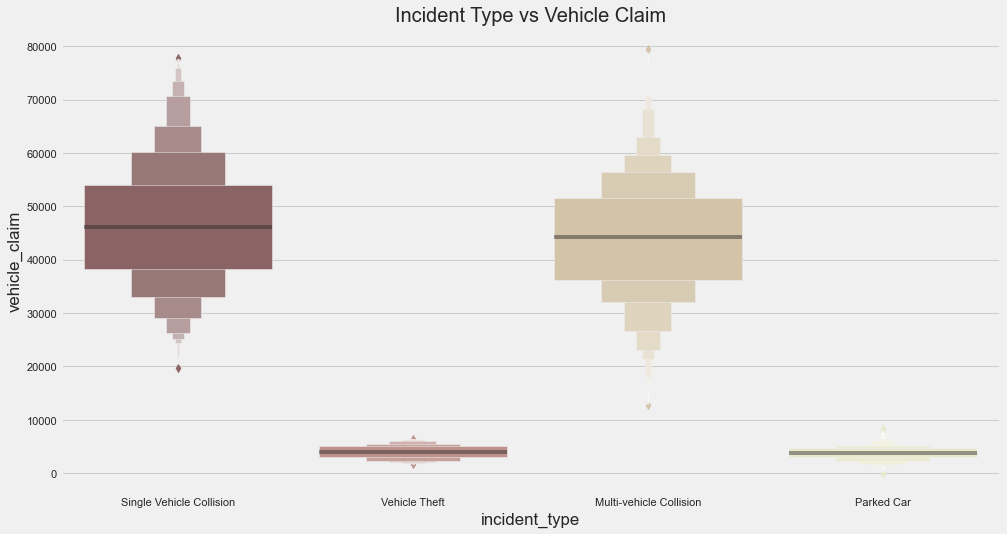

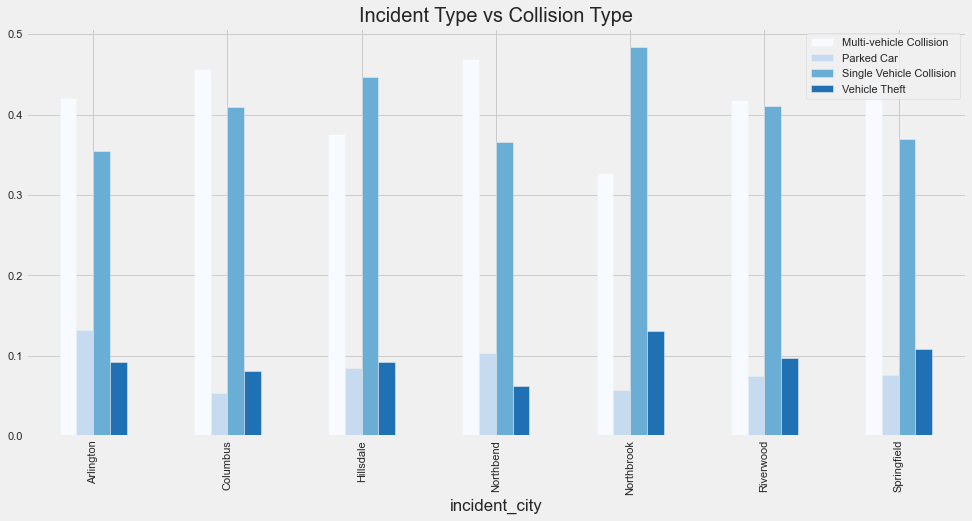

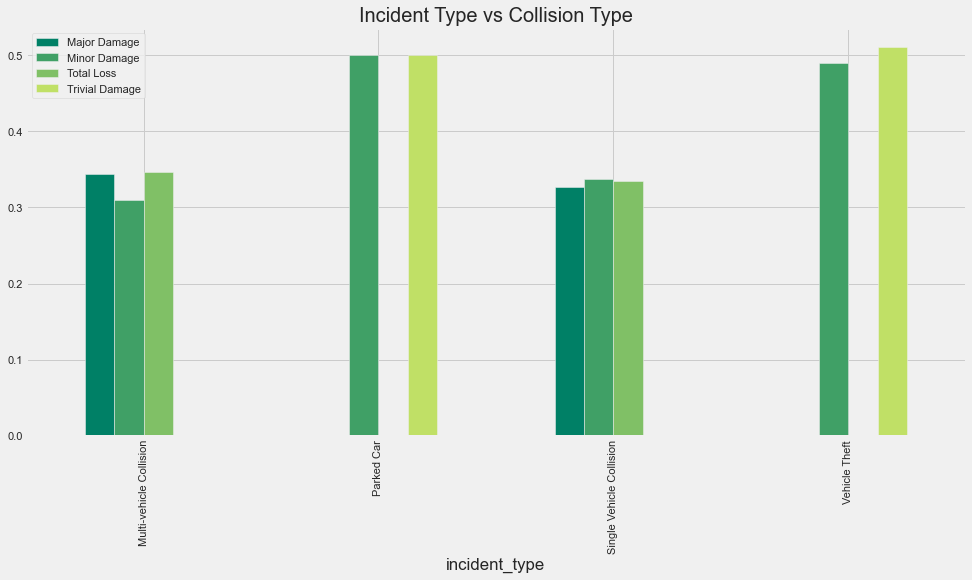

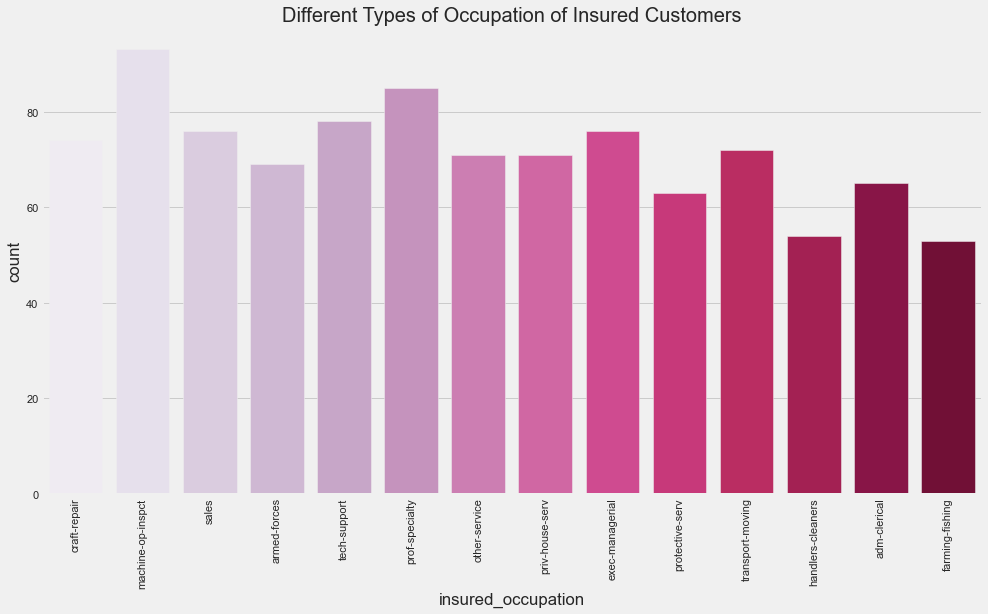

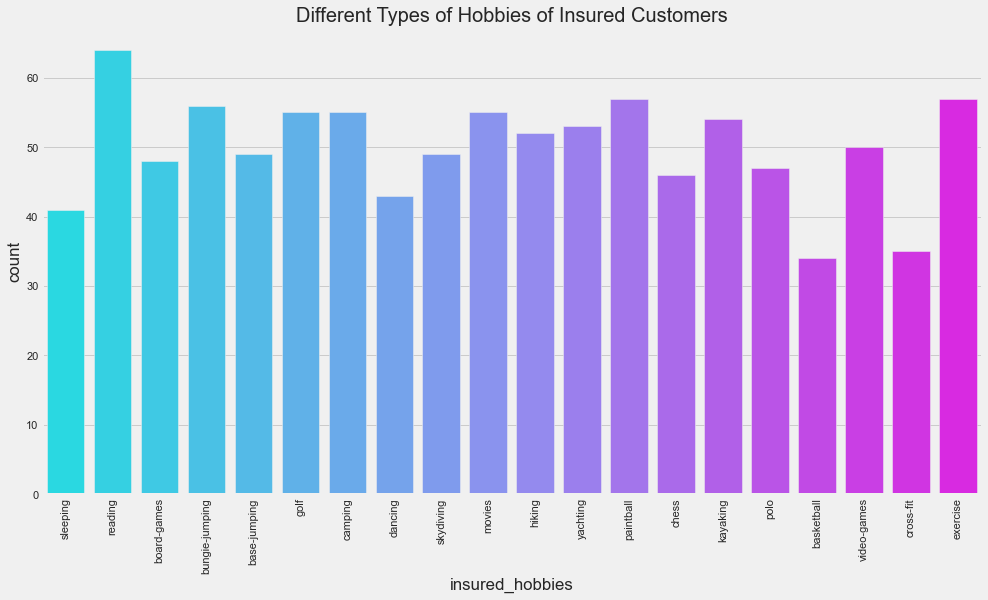

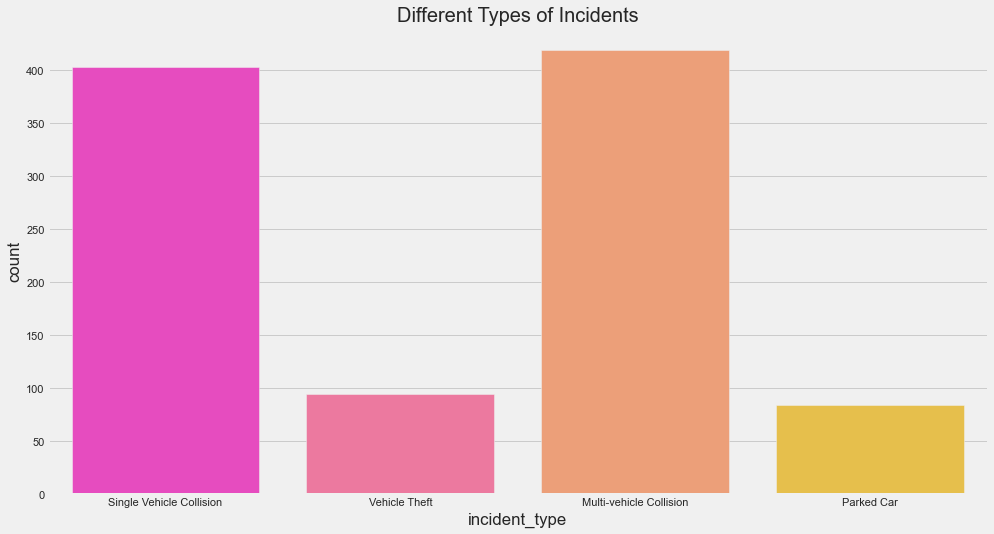

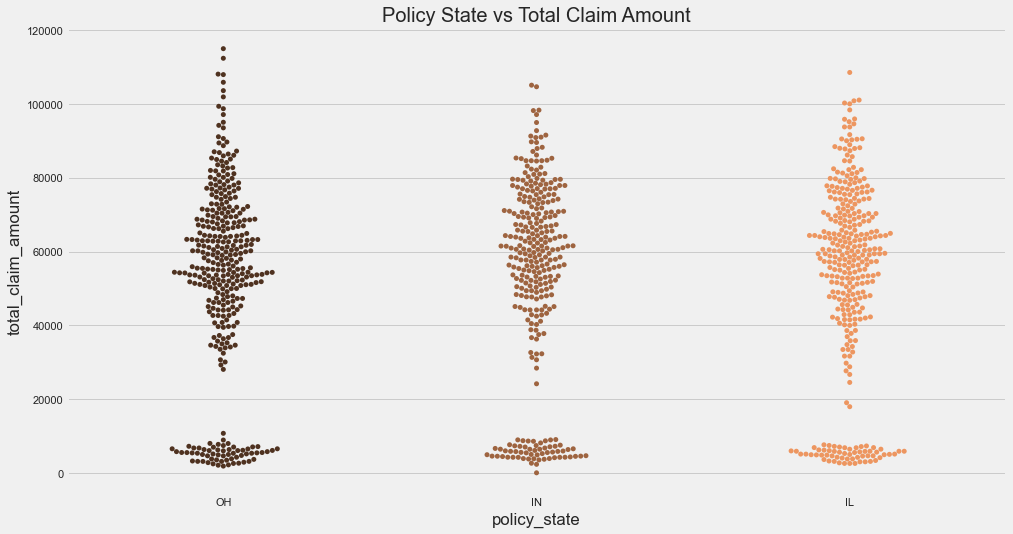

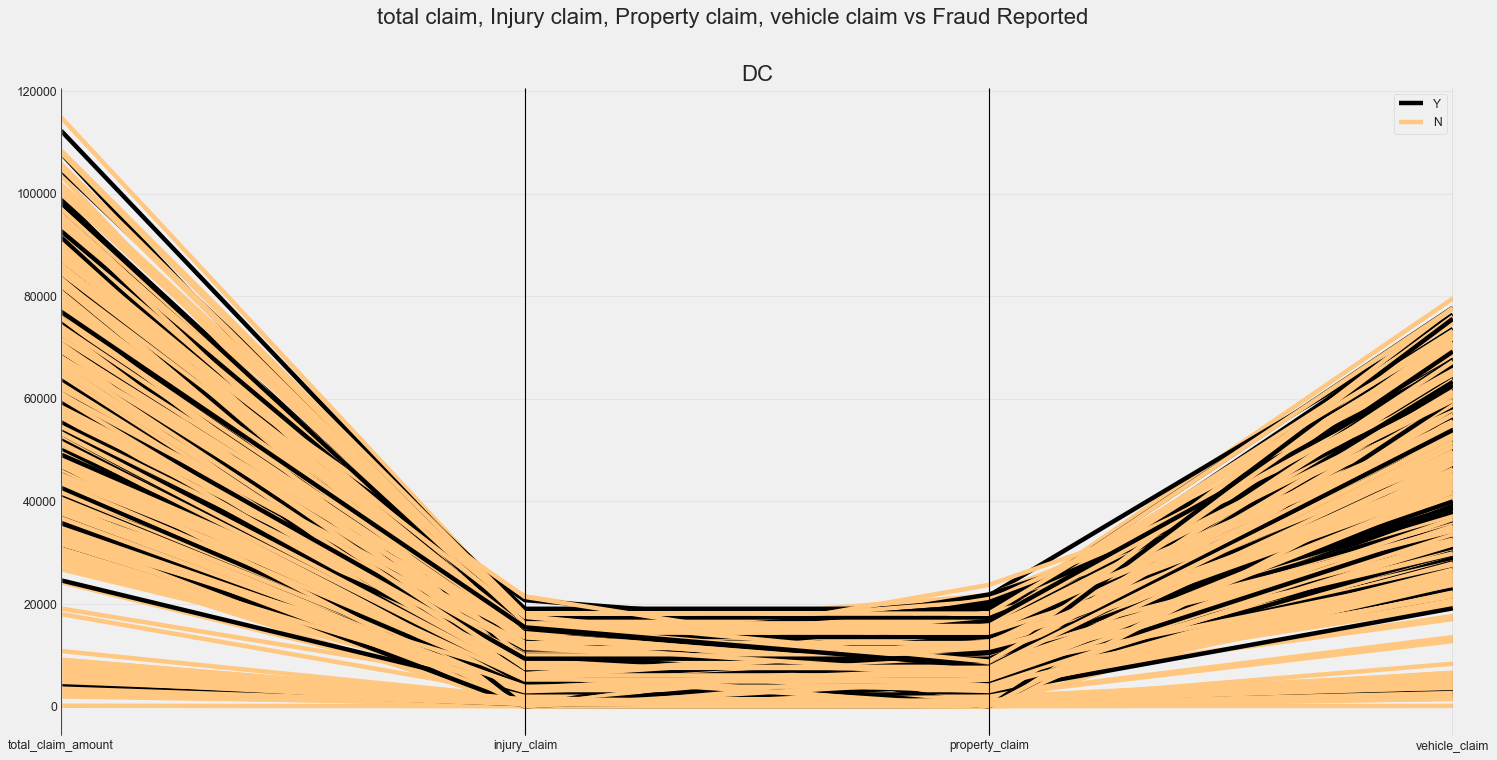

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', '_c39', 'incident_month',
       'incident_day'],
      dtype='object')


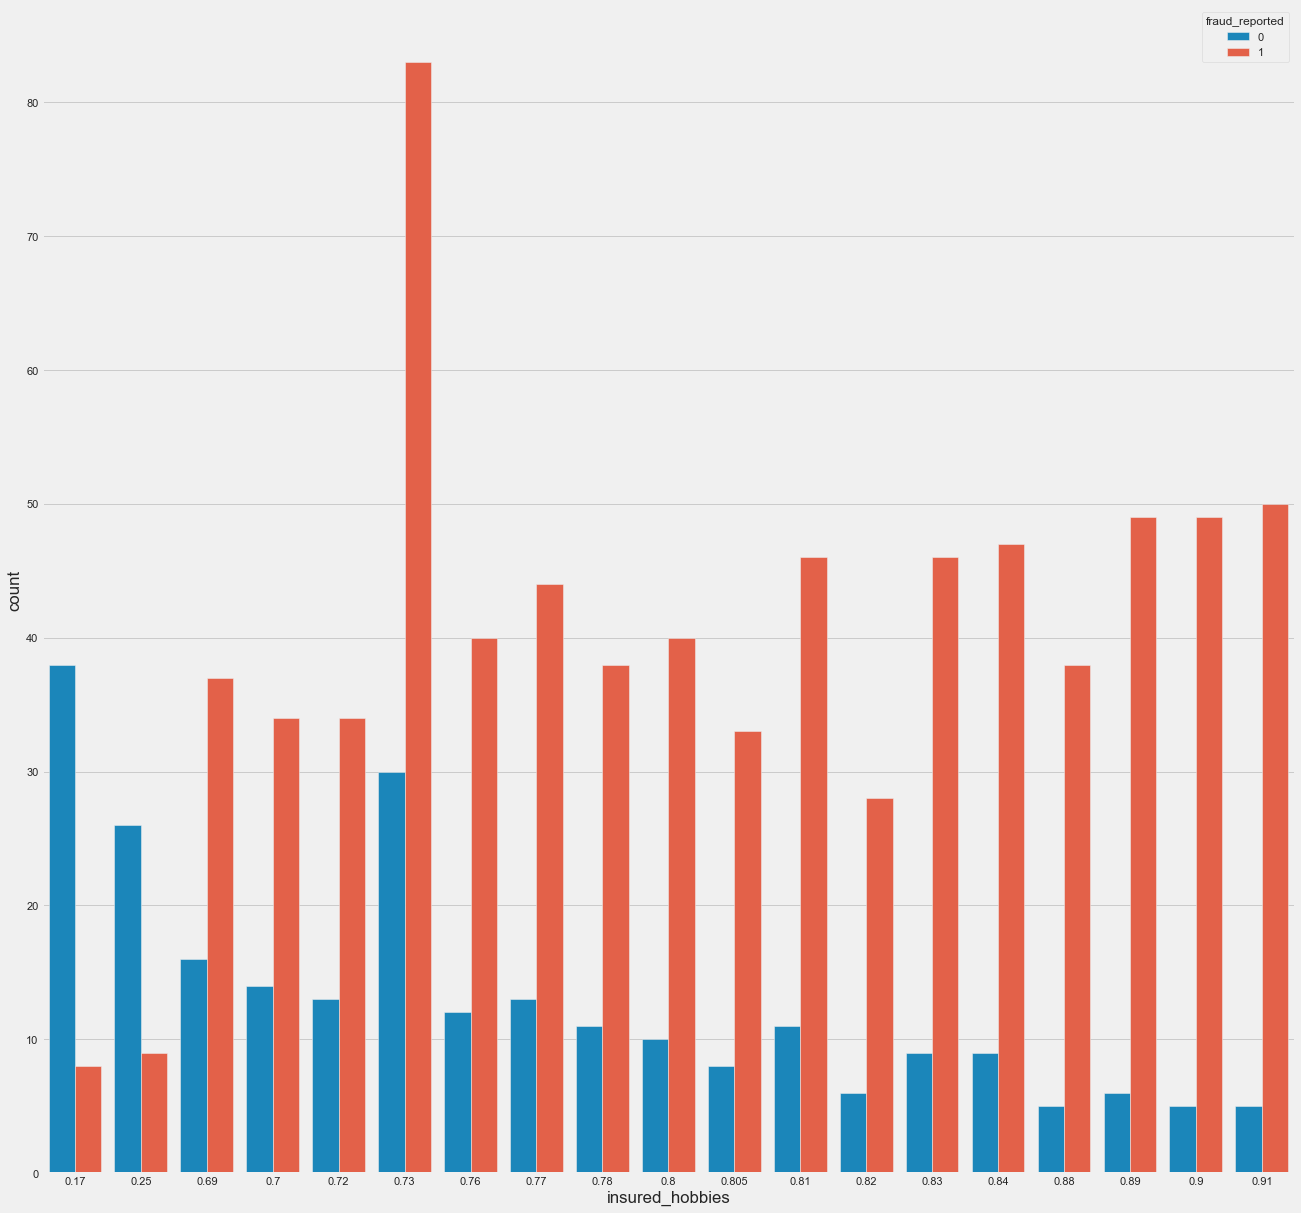

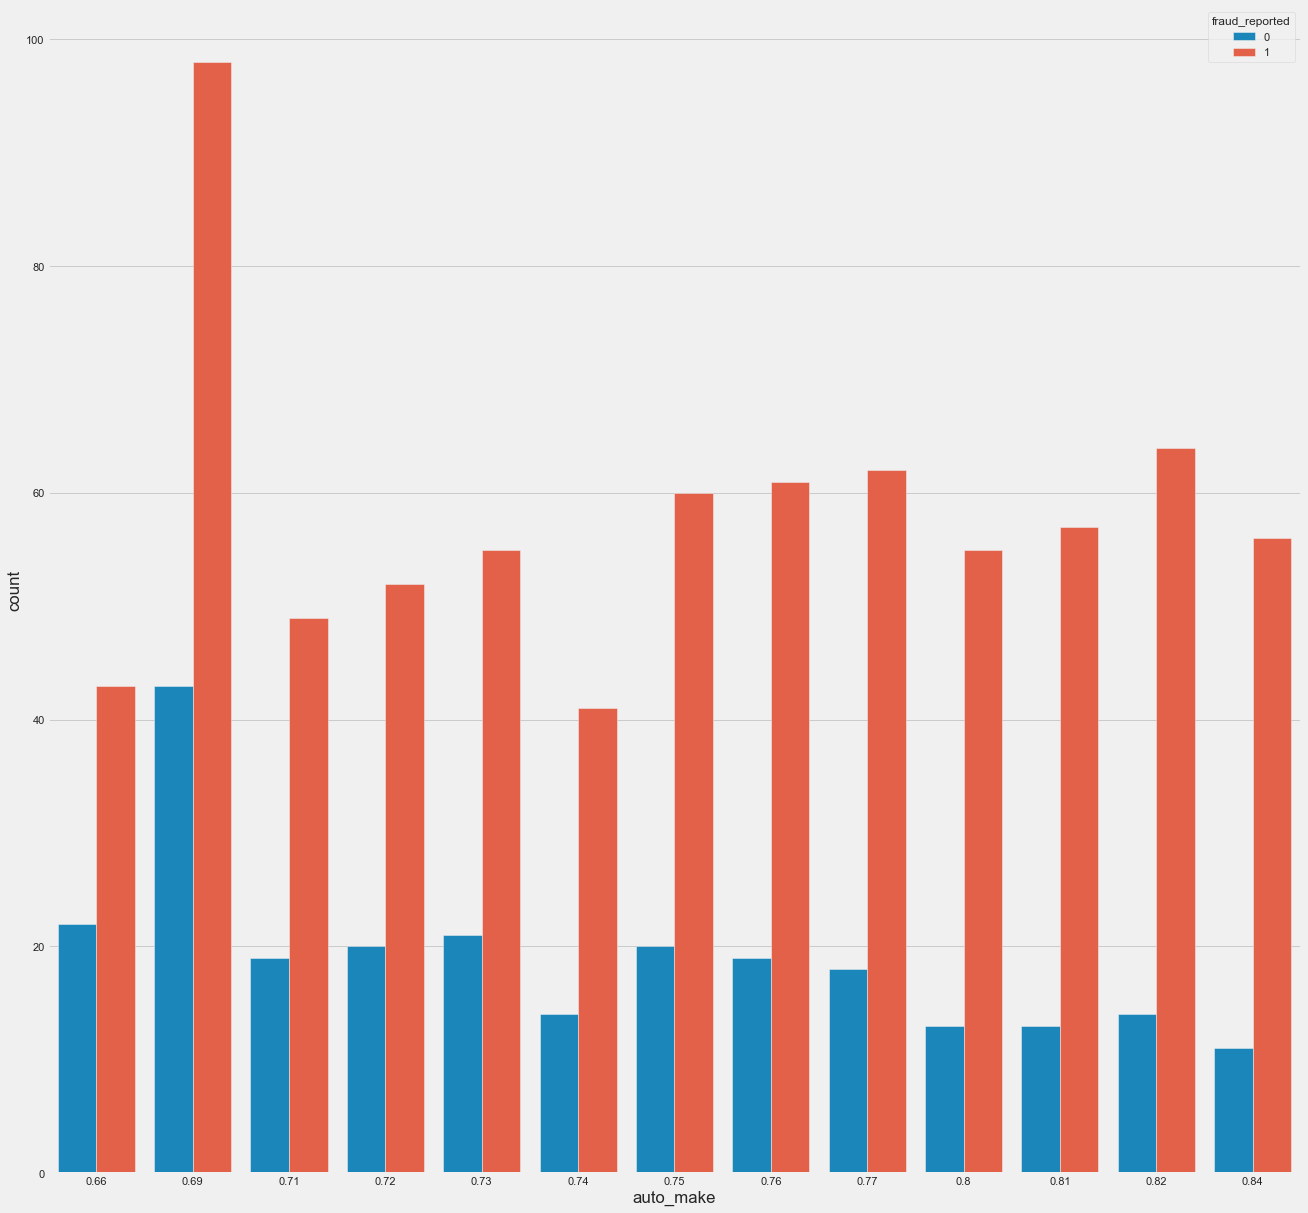

Training Features shape:  (1000, 37)


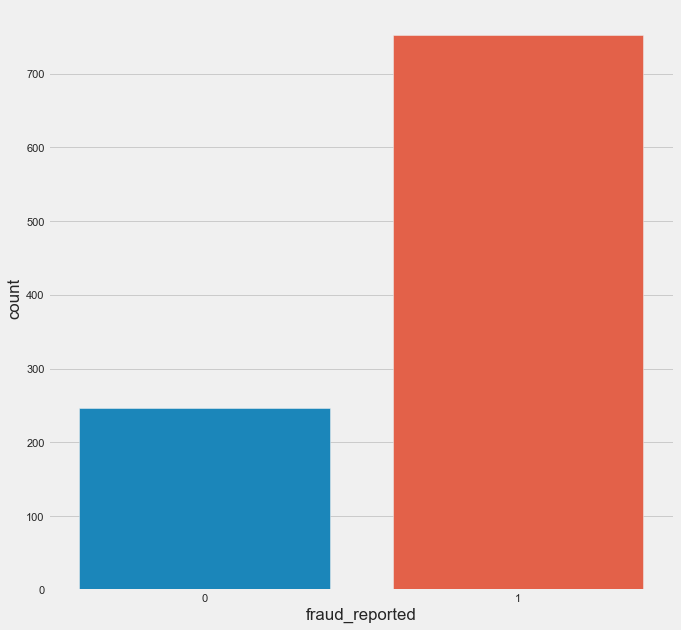

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make 

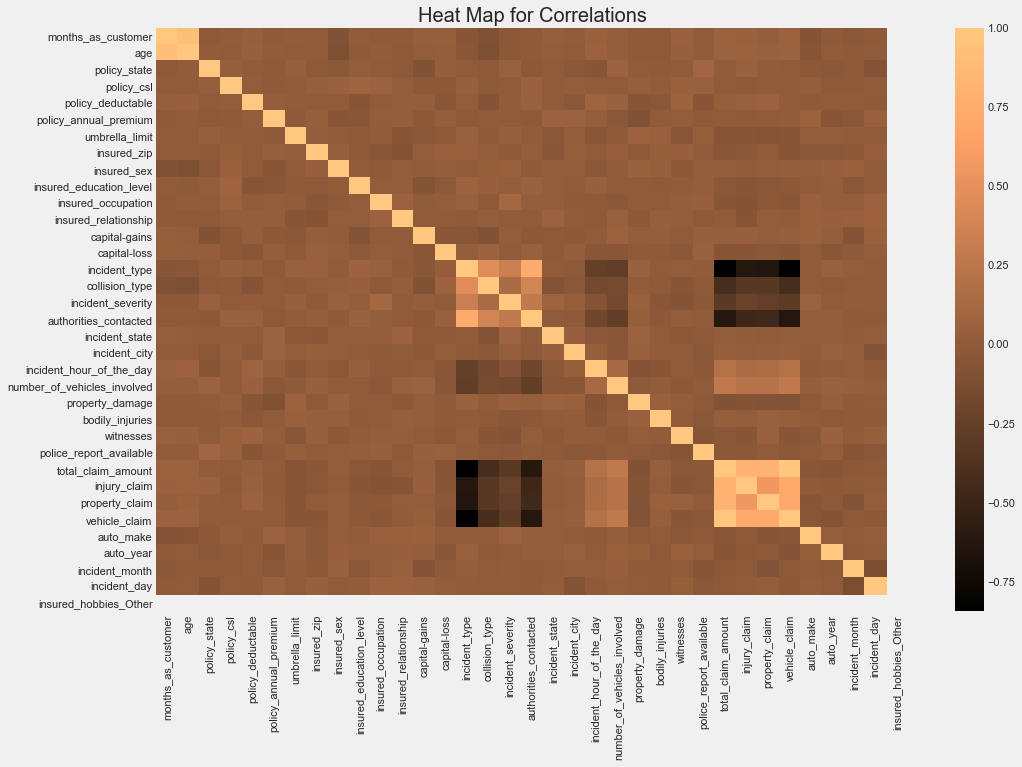

Training until validation scores don't improve for 100 rounds
[100]	training's f1: 0.868327	valid_1's f1: 0.836257
[200]	training's f1: 0.89707	valid_1's f1: 0.843077
[300]	training's f1: 0.910619	valid_1's f1: 0.848297
[400]	training's f1: 0.919629	valid_1's f1: 0.850932
Early stopping, best iteration is:
[324]	training's f1: 0.912711	valid_1's f1: 0.850932
LightGBM Training Completed...


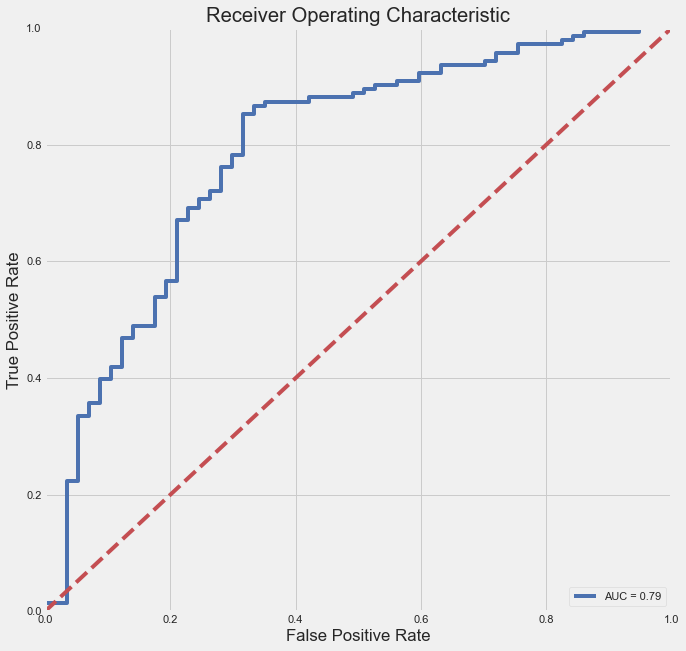

Plot feature importances...


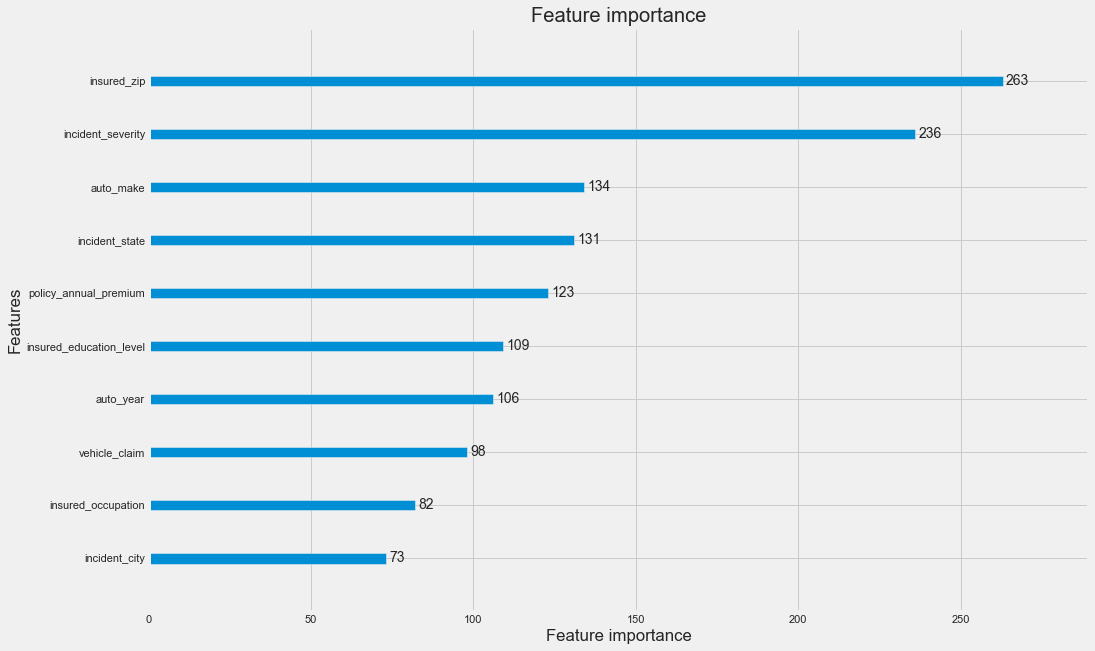

Training Accuracy:  0.90125
Testing Accuarcy:  0.79
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        57
           1       0.87      0.83      0.85       143

    accuracy                           0.79       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.80      0.79      0.79       200



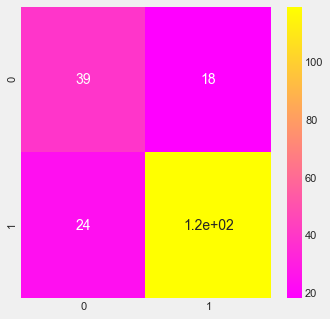

Training Accuracy:  0.7975
Testing Accuarcy:  0.72
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        57
           1       0.85      0.74      0.79       143

    accuracy                           0.72       200
   macro avg       0.68      0.70      0.68       200
weighted avg       0.75      0.72      0.73       200



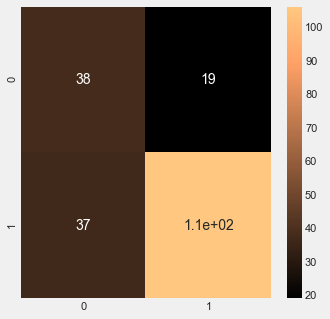

Training Accuracy:  0.94875
Testing Accuarcy:  0.795
              precision    recall  f1-score   support

           0       0.64      0.65      0.64        57
           1       0.86      0.85      0.86       143

    accuracy                           0.80       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.80      0.80      0.80       200



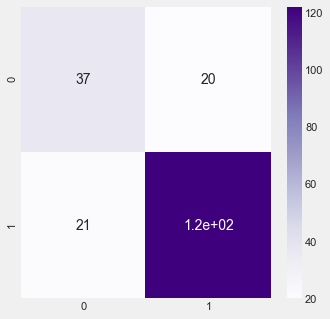

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        57
           1       0.87      0.83      0.85       143

    accuracy                           0.79       200
   macro avg       0.74      0.75      0.75       200
weighted avg       0.79      0.79      0.79       200



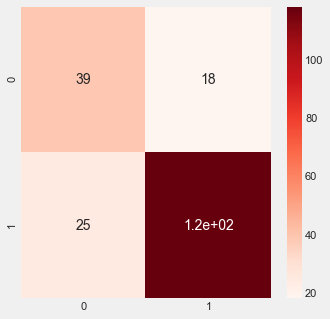

              precision    recall  f1-score   support

           0       0.60      0.68      0.64        57
           1       0.87      0.82      0.84       143

    accuracy                           0.78       200
   macro avg       0.73      0.75      0.74       200
weighted avg       0.79      0.78      0.78       200



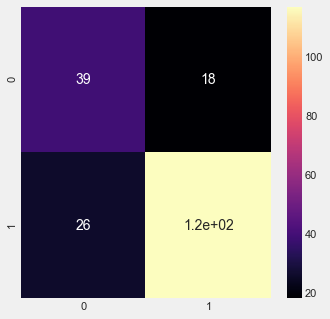

1    753
0    247
Name: fraud_reported, dtype: int64
247
753
247
494
(494, 35)
(494, 1)
(395, 35)
(395, 1)
(99, 35)
Training Accuracy:  1.0
Testing Accuarcy:  0.7878787878787878


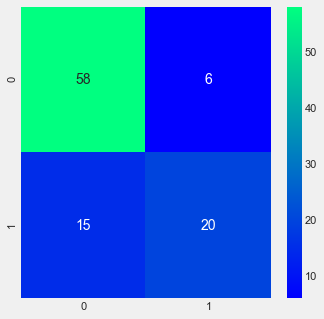

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        64
           1       0.77      0.57      0.66        35

    accuracy                           0.79        99
   macro avg       0.78      0.74      0.75        99
weighted avg       0.79      0.79      0.78        99

(1506, 35)
(1506,)
(1204, 35)
(1204,)
(302, 35)
(302,)
Training Accuracy:  1.0
Testing Accuarcy:  0.8443708609271523


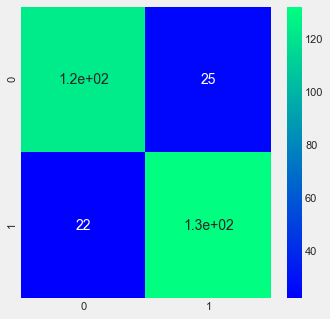

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       148
           1       0.84      0.86      0.85       154

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302

*****************************************
Results on testing data:
*****************************************
Accuracy = 0.71
Precision = 0.993006993006993
Recall = 0.7135678391959799

AUC value = 0.35678391959798994
*****************************************
Results on testing data:
*****************************************
Accuracy = 0.675
Precision = 0.9020979020979021
Recall = 0.7166666666666667

AUC value = 0.5083333333333333
*****************************************
Results on testing data:
*****************************************
Accuracy = 0.76
Precision = 0.916083916083916
Recall = 0.7844311377245509

AUC value = 0.7103973870440937
*************************

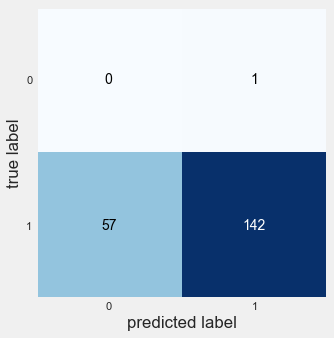

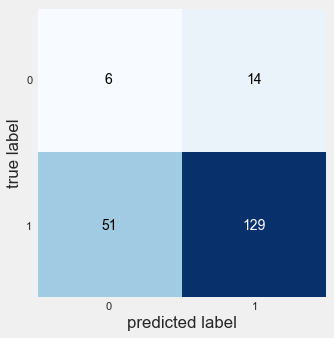

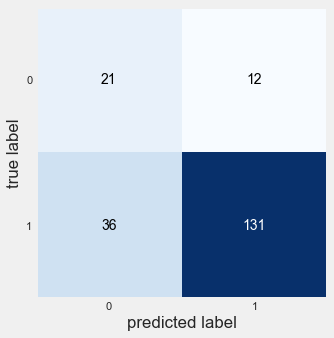

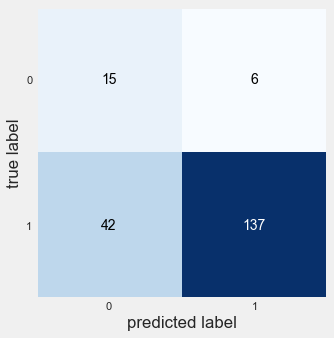

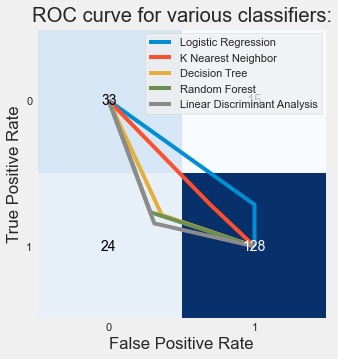

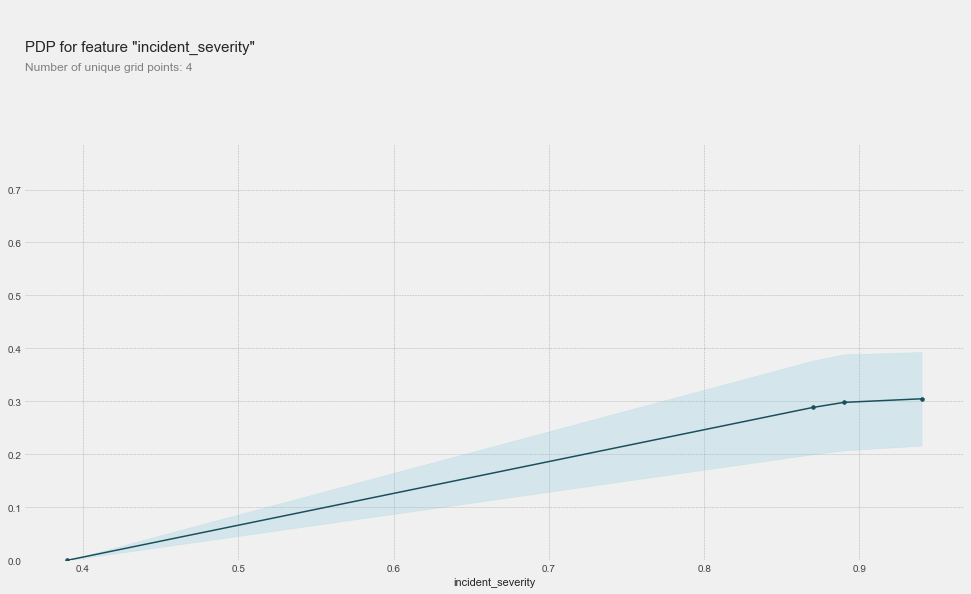

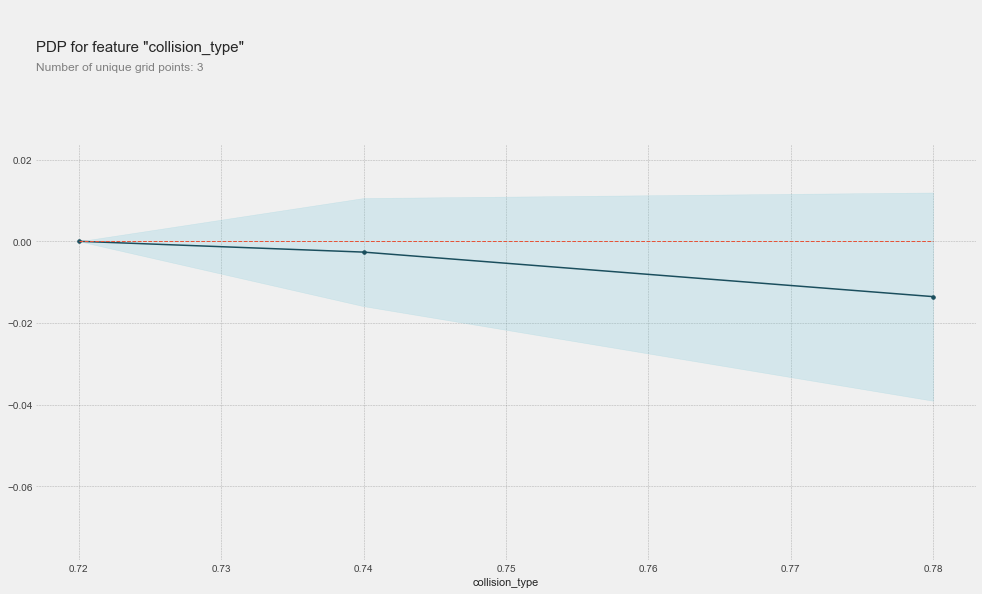

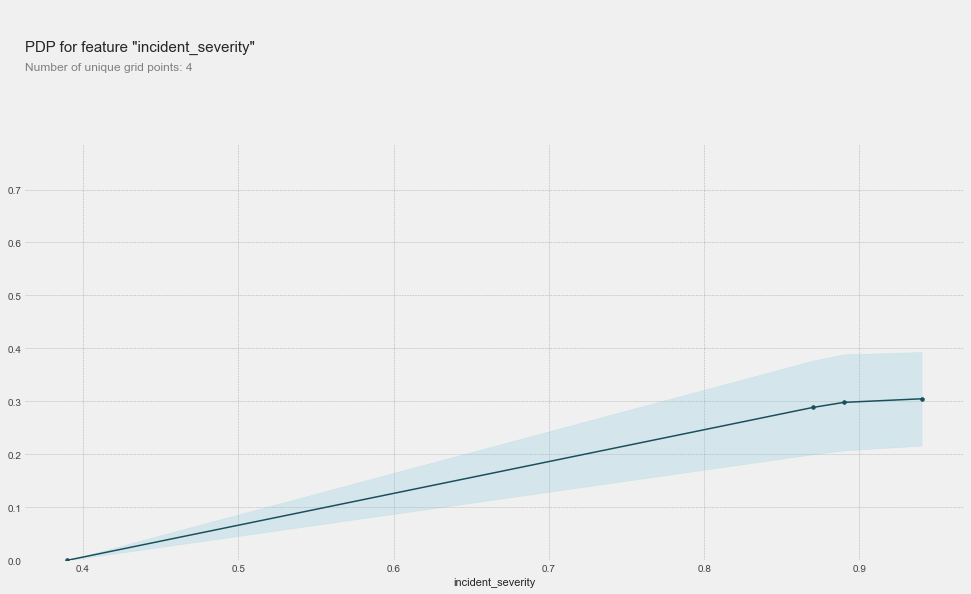

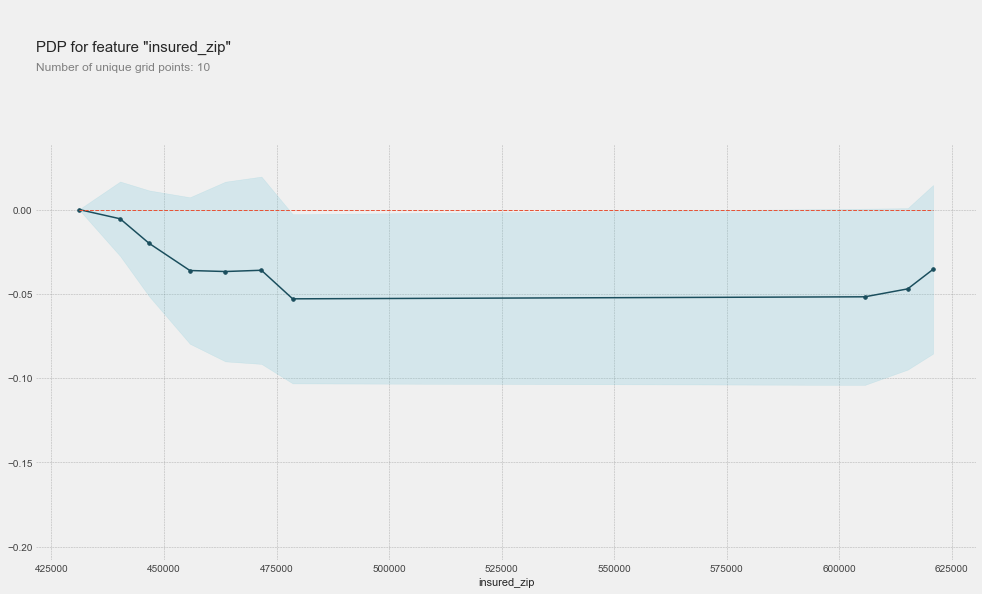

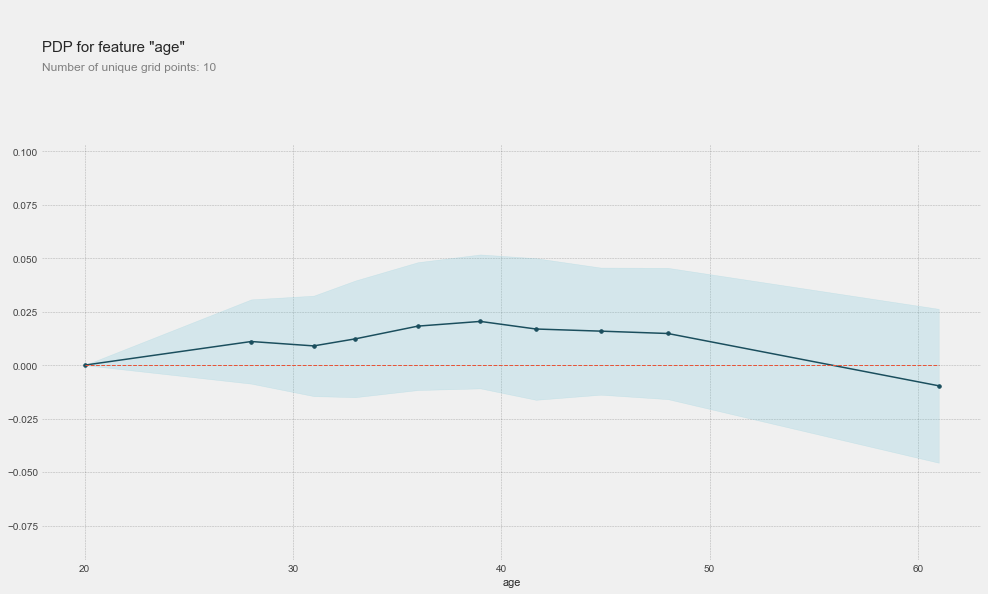

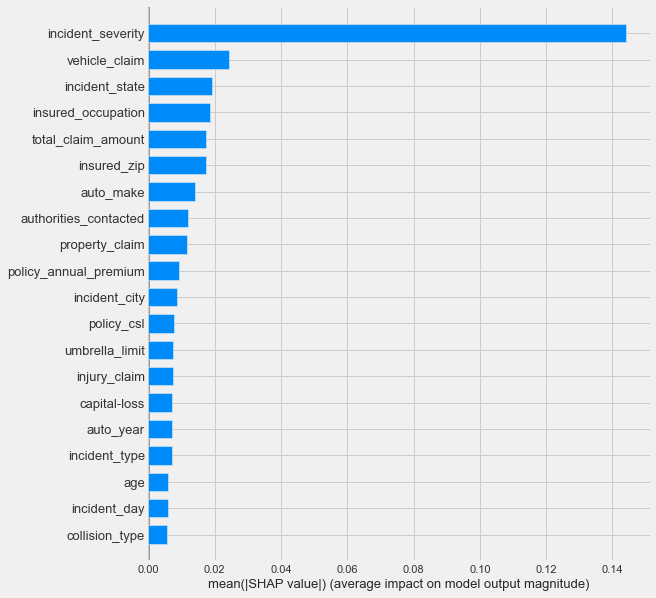

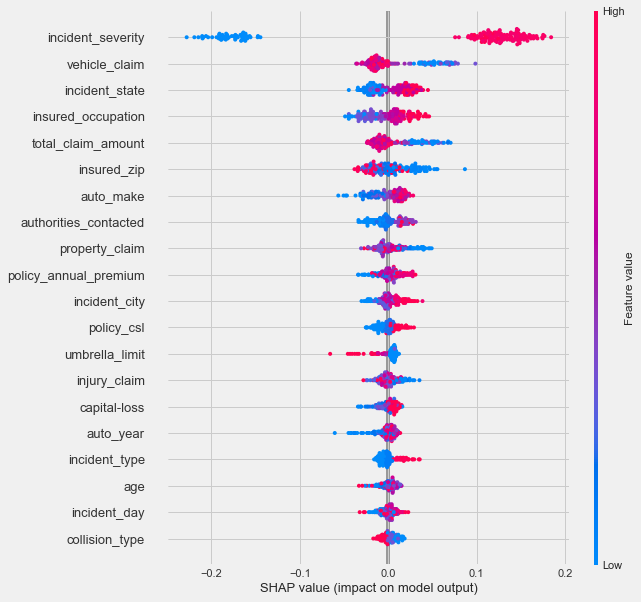

In [15]:

if __name__ == '__main__':
    
    shap.initjs() 
    data = load_dataset(dataset_file_name)
    data, missing_values = in_detail_insight_on_the_dataset(data)
    data1, le_count = encode_object_type_column_of_dataset_and_heatmap(data)
    table, data = number_of_unique_data_in_dataset_column_and_fillna(data)
    start_data_visualizations(data)
    data = in_DETAIL_data_processing_and_Exploring(data)
    data, x, y, X_train, X_test, y_train, y_test, x_train, x_test, predictors_train, predictors_test, response_train, response_test  = analyzed_data_visualization(data)
    data, model_brfc = model_check(data, x, y, X_train, X_test, y_train, y_test, x_train, x_test, predictors_train, predictors_test, response_train, response_test)
    model_explanation_analysis_and_prediction_architecture_visualization(x_train, x_test, y_test, model_brfc)
    

In [16]:
print("---------------------------   CHECK DONE  .   --------------------------")

---------------------------   CHECK DONE  .   --------------------------


In [17]:
print("|||||||||||||||||||||||||||||   check end   |||||||||||||||||||||||||||||||||||||")

|||||||||||||||||||||||||||||   check end   |||||||||||||||||||||||||||||||||||||
